# Representing Qubit States

To continue further in this course, we need a way of writing down qubit states. You will see by the end of chapter 2, that using only vectors and matrices we can write down the state of any set of qubits and any quantum operation. **Before you continue**, you should be comfortable with complex numbers. Knowledge of linear algebra will help, although there are reminders of important concepts scattered throughout. If you need a more in-depth explanation or refresher, you can check out the mathematics prerequisite [here](../ch-prerequisites/linear_algebra.ipynb).

## Contents

1. [Classical vs Quantum Bits](#cvsq)    
    1.1 [Statevectors](#statevectors)      
    1.2 [Qubit Notation](#notation)    
    1.3 [Exploring Qubits with Qiskit](#exploring-qubits)    
2. [The Rules of Measurement](#rules-measurement)    
    2.1 [A Very Important Rule](#important-rule)    
    2.2 [The Implications of this Rule](#implications)
3. [The Bloch Sphere](#bloch-sphere)    
    3.1 [Describing the Restricted Qubit State](#bloch-sphere-1)     
    3.2 [Visually Representing a Qubit State](#bloch-sphere-2)     


## 1. Classical vs Quantum Bits <a id="cvsq"></a>

### 1.1 Statevectors<a id="statevectors"></a>

In quantum physics we use _statevectors_ to describe the state of our system. This is different from classical physics where we generally just use numbers. For example, say we wanted to describe the position of a car along a track, this is a classical system so we could use a number $x$:

![tracking a car with scalars](images/car_track_1.png)

$$ x=4 $$

Alternatively, we could instead use a collection of numbers in a vector called a  _statevector._ Each element in the statevector contains the probability of finding the car in a certain place:

![tracking a car with vectors](images/car_track_2.png)

$$
|x\rangle = \begin{bmatrix} 0\\ \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
            \begin{matrix} \\  \\  \\ \leftarrow \\  \\  \\  \\ \end{matrix}
             \begin{matrix} \\  \\ \text{Probability of} \\ \text{car being at} \\ \text{position 4} \\  \\  \\ \end{matrix}   
$$

This isn’t limited to position, we could also keep a statevector of all the possible speeds the car could have, and all the possible colours the car could be. With classical systems (like the car example above), this is a silly thing to do as it requires keeping huge vectors when we only really need one number. But as we will see in this chapter, statevectors happen to be a very good way of keeping track of quantum systems, including quantum computers.


### 1.2 Qubit Notation <a id="notation"></a>

Say we want to write down the state of a of classical bit (`c`), we just use the numbers `0` and `1`:

    c = 0

This is fine, as a classical bit always has a definite state. With qubits however, this restriction is lifted and we have probabilities of measuring different states. Each state a qubit can be measured in has an _amplitude_ (a complex number), and we need to keep track of these complex numbers. A qubit is a two-level system, so upon measurement* we will find it in one of two states:

$$ |0\rangle \quad \&  \quad |1\rangle $$

<div style="font-size: .75em"> *This is only true for one type of measurement, but do not worry about this now, we will discuss this in a future section.</div>
This means we need to keep track of two complex numbers. Vectors happen to be a great way of doing this:

$$ |q_0\rangle = \begin{bmatrix} \tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix} $$

Here we use the elements of the vector ($|q_0\rangle$) to store a ‘list’ of the complex amplitudes of the states $|0\rangle$ and $|1\rangle$. In this case, $|0\rangle$ has amplitude $\tfrac{1}{\sqrt{2}}$ and $|1\rangle$ has amplitude $\tfrac{i}{\sqrt{2}}$. Notice that we denote a column vector by enclosing it between the $|$ and $\rangle$ symbols. The state's amplitude is related to the probability of measuring the qubit in that state. If our qubit is definitely in the state $|0\rangle$, the amplitude of $|0\rangle$ is 1, and the amplitude of $|1\rangle$ is 0. Thus we can write:

$$ |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $$

And similarly:

$$ |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$

Note that $|0\rangle$ and $|1\rangle$ form an orthonormal basis, and we can represent any 2D vector with a combination of $|0\rangle$ and $|1\rangle$. Knowing this, we can write the state of our qubit in the alternative form:

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$


<p>
 <details>
  <summary>Reminder: Matrix Addition and Multiplication by Scalars (Click here to expand)</summary>
  <p>To add two vectors, we add their elements together:
    $$|a\rangle = \begin{bmatrix}a_0 \\ a_1 \\ \vdots \\ a_n \end{bmatrix}, \quad
    |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}$$
    $$|a\rangle + |b\rangle = \begin{bmatrix}a_0 + b_0 \\ a_1 + b_1 \\ \vdots \\ a_n + b_n \end{bmatrix} $$
    </p>
  <p>And to multiply a vector by a scalar, we multiply each element by the scalar:
    $$x|a\rangle = \begin{bmatrix}x \times a_0 \\ x \times  a_1 \\ \vdots \\ x \times  a_n \end{bmatrix}$$
    </p>
  <p>These two rules are used to rewrite the vector $|q_0\rangle$ (as shown above):
      $$
      \begin{aligned} 
      |q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \\
                  & = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1\\0\end{bmatrix} + \tfrac{i}{\sqrt{2}}\begin{bmatrix}0\\1\end{bmatrix}\\
                  & = \begin{bmatrix}\tfrac{1}{\sqrt{2}}\\0\end{bmatrix} + \begin{bmatrix}0\\\tfrac{i}{\sqrt{2}}\end{bmatrix}\\
                  & = \begin{bmatrix}\tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix}\\
      \end{aligned}
      $$
 </details>
</p>
<p>
 <details>
  <summary>Reminder: Orthonormal Bases (Click here to expand)</summary>
  <p>
      It was stated before that the two vectors $|0\rangle$ and $|1\rangle$ are orthonormal, this means they are both <i>orthogonal</i> and <i>normalised</i>. Orthogonal means the vectors are at right angles:
  </p><p><img src="images/basis.svg"></p>
  <p>And normalised means their magnitudes (length of the arrow) is equal to 1. The two vectors $|0\rangle$ and $|1\rangle$ are <i>linearly independent</i>, which means we cannot describe $|0\rangle$ in terms of $|1\rangle$, and vice versa. However, using both the vectors $|0\rangle$ and $|1\rangle$, and our rules of addition and multiplication by scalars, we can describe all possible vectors in 2D space:
    </p><p><img src="images/basis2.svg"></p>
  <p>Because the vectors $|0\rangle$ and $|1\rangle$ are linearly independent, and can be used to describe any vector in 2D space using vector addition and scalar multiplication, we say the vectors $|0\rangle$ and $|1\rangle$ form a <i>basis</i>. In this case, since they are both orthogonal and normalised, we call it an <i>orthonormal basis</i>.
 </details>
</p>


This vector, $|q_0\rangle$ is called the qubit's _statevector,_ it tells us everything we could possibly know about this qubit. Since both $|0\rangle$ and $|1\rangle$ have non-zero amplitudes, the qubit is said to be in a _superposition_ of the states $|0\rangle$ and $|1\rangle$. 

### 1.3 Exploring Qubits with Qiskit <a id="exploring-qubits"></a>

First, we need to import all the tools we will need:

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

Additionally, we will change our configuration to improve the image output (if you are not running in an IPython environment you should ignore this line):

In [2]:
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In qiskit, we use the `QuantumCircuit` object to store our circuits, this is essentially a list of the quantum gates in our circuit and the qubits they are applied to.

In [3]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In our quantum circuits, our qubits always start out in the state $|0\rangle$. We can use `Initialize()` to transform this into any state. We give `Initialize()` the vector we want in the form of a list, and append it to the circuit:

In [4]:
from qiskit.extensions import Initialize # Import the Inititialize function
inital_state = [0,1]   # Define initial_state as |1>
init_op = Initialize(inital_state) # Create Initialisation Operation for state |1>
qc.append(init_op,[0]) # Apply initialisation operation to the qubit (it's index is 0)
qc.draw()              # Let's view our circuit

┌─────────────────┐
q_0: |0>┤ Initialize(0,1) ├
        └─────────────────┘

We can then use one of Qiskit’s simulators to view the resulting state of our qubit. To begin with we will use the statevector simulator, but we will explain the different simulators and their uses later.

In [5]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

To get the results from our circuit, we use `execute` to run our circuit, giving the circuit and the backend as arguments. We then use `.result()` to get the result of this:

In [6]:
result = execute(qc,backend).result() # Do the simulation, returning the result

from `result`, we can then get the final statevector using `.get_statevector()`:

In [7]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


**Note:** Python uses `j` to represent $i$ in complex numbers. We see a vector with two complex elements: `0.+0.j` = 0, and `1.+0.j` = 1.

Let’s now measure our qubit as we would in a real quantum computer and see the result:

In [8]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
     q_0: |0>┤ Initialize(0,1) ├─░─┤M├
             └─────────────────┘ ░ └╥┘
measure_0: 0 ═══════════════════════╩═

This time, instead of the statevector we will get the counts for the `0` and `1` results using `.get_counts()`:

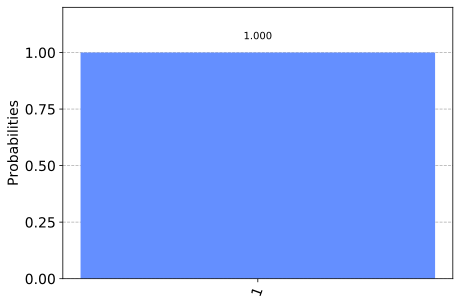

In [9]:
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

We can see that we (unsurprisingly) have a 100% chance of measuring $|1\rangle$. This time, let’s instead put our qubit into a superposition and see what happens. We will use the state $|q_0\rangle$ from earlier in this section:

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$

We need to add these amplitudes to a python list. To add a complex amplitude we use `complex`, giving the real and imaginary parts as arguments:

In [10]:
inital_state = [1/sqrt(2), complex(0,1/sqrt(2))] # Define state |q>

And we then repeat the steps for initialising the qubit as before:

In [11]:
qc = QuantumCircuit(1) # Must redefine qc
init_op = Initialize(inital_state)   # Create Initialisation Operation for state |q>
qc.append(init_op,[0]) # Add our initialisation operation to the circuit (the qubit's index is 0)
state = execute(qc,backend).result().get_statevector() # Execute the circuit
print(state)           # Print the result

[0.70710678+0.j         0.        +0.70710678j]


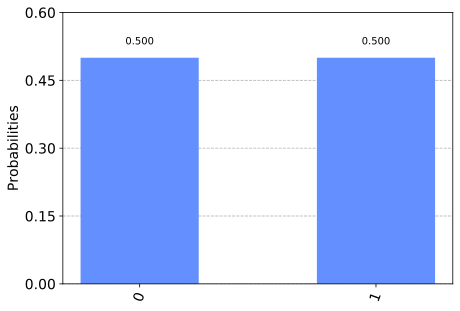

In [12]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

We can see we have equal probability of measuring either $|0\rangle$ or $|1\rangle$. To explain this, we need to talk about measurement.

## 2. The Rules of Measurement <a id="rules-measurement"></a>
### 2.1 A Very Important Rule <a id="important-rule"></a>

There is a simple rule for measurement. To find the probability of measuring a state $|\psi \rangle$ in the state $|x\rangle$ we do:

$$p(|x\rangle) = | \langle \psi| x \rangle|^2$$

The symbols $\langle$ and $|$ tell us $\langle \psi |$ is a row vector. In quantum mechanics we call the column vectors _kets_ and the row vectors _bras._ Together they make up _bra-ket_ notation. Any ket $|a\rangle$ has a corresponding bra $\langle a|$, and we convert between them using the conjugate transpose.

<details>
  <summary>Reminder: The Inner Product (Click here to expand)</summary>
    <p>There are different ways to multiply vectors, here we use the <i>inner product</i>. The inner product is a generalisation of the <i>dot product</i> which you may already be familiar with. In this guide, we use the inner product between a bra (row vector) and a ket (column vector), and it follows this rule:
        
$$\langle a| = \begin{bmatrix}a_0^*, & a_1^*, & \dots & a_n^* \end{bmatrix}, \quad
    |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}$$
    $$\langle a|b\rangle = a_0^* b_0 + a_1^* b_1 \dots a_n^* b_n$$
    </p>
  <p>We can see that the inner product of two vectors always gives us a scalar. A useful thing to remember is that the inner product of two orthogonal vectors is 0, for example if we have the orthogonal vectors $|0\rangle$ and $|1\rangle$:
    $$\langle1|0\rangle = \begin{bmatrix} 0 , & 1\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 0$$
    </p>
  <p>Additionally, remember that the vectors $|0\rangle$ and $|1\rangle$ are also normalised (magnitudes are equal to 1):
    
$$
      \begin{aligned} 
      \langle0|0\rangle & = \begin{bmatrix} 1 , & 0\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 1 \\
      \langle1|1\rangle & = \begin{bmatrix} 0 , & 1\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = 1
      \end{aligned}
$$
   </p>
</details>

In the equation above, $|x\rangle$ can be any qubit state. To find the probability of measuring $|x\rangle$, we take the inner product of $|x\rangle$ and the state we are measuring (in this case $|\psi\rangle$), then square the magnitude. This may seem a little convoluted, but it will soon become second nature.

If we look at the state $|q_0\rangle$ from before, we can see the probability of measuring $|0\rangle$ is indeed $0.5$:

$$
\begin{aligned}
|q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \\
\langle q_0| & = \tfrac{1}{\sqrt{2}}\langle0| - \tfrac{i}{\sqrt{2}}\langle 1| \\
\langle q_0| 0 \rangle  & = \tfrac{1}{\sqrt{2}}\langle 0|0\rangle - \tfrac{i}{\sqrt{2}}\langle 1|0\rangle \\
\langle q_0| 0 \rangle  & = \tfrac{1}{\sqrt{2}}\cdot 1 -  \tfrac{i}{\sqrt{2}} \cdot 0\\
\langle q_0| 0 \rangle  & = \tfrac{1}{\sqrt{2}}\\
|\langle q_0| 0 \rangle|^2 & = \tfrac{1}{2}
\end{aligned}
$$

You should verify the probability of measuring $|1\rangle$ as an exercise. 

### 2.2 The Implications of this Rule <a id="implications"></a>
### #1 Normalisation
This rule implies three things, the first is that the statevector should be normalised to 1.

If we want the probabilities to add up to 1 (which they should!) we need the magnitude of the state vector to be 1.

$$ \langle\psi|\psi\rangle = 1 \\ $$

Thus if:

$$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $$

Then:

$$ \sqrt{|\alpha|^2 + |\beta|^2} = 1 $$

This explains the factors of $\sqrt{2}$ you have seen throughout this chapter. In fact, if we try to give `Initialize()` a vector that isn’t normalised, it will give us an error:

In [13]:
vector = [1,1]
Initialize(vector)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

#### Quick Exercise
1. Create a state vector that will give a $1/3$ probability of measuring $|0\rangle$.
2. Create a different state vector that will give the same measurement probabilities.
3. Verify that the probability of measuring $|1\rangle$ for these two states is $2/3$.

You can check your answer in the widget below (you can use 'pi' and 'sqrt' in the vector):

In [14]:
# Run the code in this cell to interact with the widget
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

### #2 Global Phase

The second implication is that the total phase of the qubit (global phase) does not matter to us, only the difference in phase between $|0\rangle$ and  $|1\rangle$ (relative phase). This is because the global phase disappears when we calculate the measurement probability. For example, the two states:

$$|a\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ i\end{bmatrix} \quad \& \quad |b\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}i \\ -1\end{bmatrix}$$

Are equivalent to us, since we can multiply one by a factor of $i$ to get the other:

$$ 
\begin{aligned} 
i\times\tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ i\end{bmatrix} & = \tfrac{1}{\sqrt{2}}\begin{bmatrix}i \\ -1\end{bmatrix}\\
\\
i|a\rangle & = |b\rangle
\end{aligned}
$$

And when we calculate the measurement probability:

$$ |\langle x|a\rangle|^2 = |\langle x|i|a\rangle|^2 = |\langle x|b\rangle|^2 $$

### #3 The Observer Effect

We know that the amplitudes contain information about the probability of us finding the qubit in a specific state, but once we have measured the qubit, we know with certainty what the state of the qubit is. For example, if we measure a qubit in the state:

$$ |q\rangle = \alpha|0\rangle + \beta|1\rangle$$

And find it in the state $|0\rangle$, if we measure again, there is a 100% chance of finding the qubit in the state $|0\rangle$. This means the act of measuring _changes_ the state of our qubits.

$$ |q\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \xrightarrow{\text{Measure }|0\rangle} |q\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

In fact, measuring not only changes the state of our qubits, it _destroys_ the superposition of our qubit, replacing it with one of two definite states. As a result, we almost always place the measurements at the end of our circuit. We sometimes refer to this destructive measurement as _collapsing_ the state of the qubit.

We can demonstrate this using Qiskit’s statevector simulator. Let's initialise a qubit in superposition:

In [15]:
qc = QuantumCircuit(1) # Redefine qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
init_state = Initialize(inital_state)
qc.append(init_state, [0])
qc.draw()

┌──────────────────────────────┐
q_0: |0>┤ Initialize(0.70711,0.70711j) ├
        └──────────────────────────────┘

This circuit initialises our qubit in the state:

$$ |q\rangle = \tfrac{i}{\sqrt{2}}|0\rangle + \tfrac{1}{\sqrt{2}}|1\rangle $$

We can verify this using the simulator:

In [16]:
state = execute(qc,backend).result().get_statevector()
print("Qubit State = " + str(state))

Qubit State = [0.70710678+0.j         0.        +0.70710678j]


We can see here the qubit is initialised in the state ` [0.70710678+0.j, 0.+0.70710678j]`, which is:

$$ |q\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$

Qiskit has changed the global phase of the qubit, but due to the second implication, we know this is fine. Let’s now measure this qubit:


In [17]:
qc.measure_all()
qc.draw()

┌──────────────────────────────┐ ░ ┌─┐
     q_0: |0>┤ Initialize(0.70711,0.70711j) ├─░─┤M├
             └──────────────────────────────┘ ░ └╥┘
measure_0: 0 ════════════════════════════════════╩═

When we simulate this entire circuit, we can see that one of the amplitudes is _always_ 0:

In [18]:
state = execute(qc,backend).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = [1.+0.j 0.+0.j]


You can re-run this cell a few times to reinitialise the qubit and measure it again. You will notice that either outcome is equally probable, but that the state of the qubit is never a superposition of $|0\rangle$ and $|1\rangle$. Somewhat interestingly, the global phase on the state $|1\rangle$ survives, but since this is global phase, we can never measure it on a real quantum computer.

### A Note about Quantum Simulators

We can see that writing down a qubit’s state requires keeping track of two complex numbers, but when using a real quantum computer we will only ever receive a yes-or-no (`0` or `1`) answer for each qubit. The output of a 10-qubit quantum computer will look like this:

`0110111110`

Just 10 digits, no superposition or complex amplitudes. When using a real quantum computer, we cannot see the states of our qubits mid-computation, as this would destroy them! This behaviour is not ideal for learning, so Qiskit provides different quantum simulators: The `qasm_simulator` behaves as if you are interacting with a real quantum computer, and will not allow you to use `.get_statevector()`. Alternatively, `statevector_simulator`, (which we have been using in this chapter) does allow peaking at the quantum states before measurement, as we have seen. 




## 3. The Bloch Sphere <a id="bloch-sphere"></a>
### 3.1 Describing the Restricted Qubit State <a id="bloch-sphere-1"></a>

We saw earlier in this chapter that the general state of a qubit ($|q\rangle$) is:

$$
|q\rangle = \alpha|0\rangle + \beta|1\rangle
$$

$$
\alpha, \beta \in \mathbb{C}
$$

(The second line tells us $\alpha$ and $\beta$ are complex numbers). The first two implications in section 2 tell us that we cannot differentiate between some of these states. This means we can be more specific in our description of the qubit. 

Firstly, since we cannot measure global phase, we can only measure the difference in phase between the states $|0\rangle$ and $|1\rangle$. Instead of having $\alpha$ and $\beta$ be complex, we can confine them to the real numbers and add a term to tell us the relative phase between them:

$$
|q\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle
$$

$$
\alpha, \beta, \phi \in \mathbb{R}
$$

Finally, since the qubit state must be normalised, i.e.

$$
\sqrt{\alpha^2 + \beta^2} = 1
$$

we can use the trigonometric identity:

$$
\sqrt{\sin^2{x} + \cos^2{x}} = 1
$$

to describe the real $\alpha$ and $\beta$ in terms of one variable, $\theta$:

$$
\alpha = \cos{\tfrac{\theta}{2}}, \quad \beta=\sin{\tfrac{\theta}{2}}
$$

From this we can describe the state of any qubit using the two variables $\phi$ and $\theta$:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

$$
\theta, \phi \in \mathbb{R}
$$

### 3.2 Visually Representing a Qubit State <a id="bloch-sphere-2"></a>

We want to plot our general qubit state:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

If we interpret $\theta$ and $\phi$ as spherical co-ordinates ($r = 1$, since the magnitude of the qubit state is $1$), we can plot any qubit state on the surface of a sphere, known as the _Bloch sphere._

Below we have plotted a qubit in the state $|{+}\rangle$. In this case, $\theta = \pi/2$ and $\phi = 0$.

(Qiskit has a function to plot a bloch sphere, `plot_bloch_vector()`, but at the time of writing it only takes cartesian coordinates. We have included a function that does the conversion automatically).


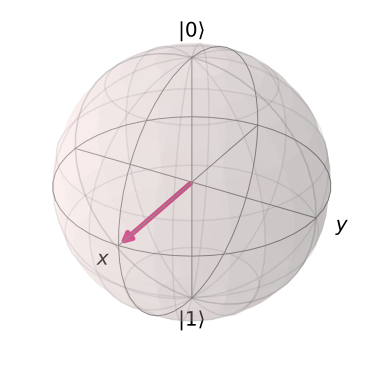

In [19]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

#### Warning!
When first learning about qubit states, it's easy to confuse the qubits _statevector_ with it's _Bloch vector_. Remember the statevector is the vector disucssed in [1.1](#notation), that holds the amplitudes for the two states our qubit can be in. The Bloch vector is a visualisation tool that maps the 2D, complex statevector onto real, 3D space.

#### Quick Exercise
Use `plot_bloch_sphere_spherical()` to plot a qubit in the states:
1. $|0\rangle$
2. $|1\rangle$
3. $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
4. $\tfrac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$
5. $\tfrac{1}{\sqrt{2}}\begin{bmatrix}i\\1\end{bmatrix}$

We have also included below a widget that converts from spherical co-ordinates to cartesian, for use with `plot_bloch_vector()`:

In [20]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x08\x06\x00\x00\x00z\xe5a\xd5\x00\…

In [21]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.6',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.15.0'}